# Project Medical Appointments Data Analysis
---
----

## Understanding the Background and Data

----

### The Data

This is the data : 

##### KaggleV2-May-2016.csv

Column | Definition
--- | -----------
PatientId | Id of the patient
AppointmentIDs | Id of the appointment
Gender | (F) Female (M) Male
ScheduledDay | The Day the appointment is scheduled
AppointmentDay | The Actual Day of the appointment
Age | Age of the patient
Neighbourhood | Where the patient comes from
Scholarship | 0 for not having the disease, 1 for having it
Hipertension | 0 for not having the disease, 1 for having it
Diabetes | 0 for not having the disease, 1 for having it
Alcoholism | 0 for not having the disease, 1 for having it
Handcap | 5 levels (0-4)
SMS_received | 0 for not receiving the message, 1 for receiving it
No-show | No for showing up, Yes for missing the appointment 

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Exploring the Dataset

In [2]:
# Medical appointments dataset retrieved from Kaggle

# lets make the columns 3 and 4 datetime objects while opening the dataset 
df = pd.read_csv('KaggleV2-May-2016.csv', parse_dates =  [3, 4])
df.info()                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [101]:
# lets describe the numeric columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [102]:
# lets understand the columns by reading the first 10 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Data examine process

# search for duplicate rows
df[df.duplicated()]

#search for null and na values
df.isnull().sum()
df.isna().sum()

There are no duplicate rows.

There are not null rows.

In [104]:
# Data examine process

# create a list of object type columns    
object_columns = df.columns[df.dtypes == 'object']
print(object_columns, "\n")

# lets find out if there are digits and numeric values in object columns
df['Gender'].str.isdigit().sum()
df['Neighbourhood'].str.isdigit().sum()
df['No-show'].str.isdigit().sum()

Index(['Gender', 'Neighbourhood', 'No-show'], dtype='object') 



'\nThere are no digits in the object columns.\n'

There are no digits in the object columns.

In [3]:
# Data engineering

# turn the column names to lowercase
df.columns = df.columns.str.lower()
df.columns 

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

## Data engineering

In [4]:
# Data engineering

# DROP THE ID COLUMNS SINCE THEY ARE NOT RELATED TO THE DATA ANALYSIS
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [286]:
# Data engineering (for pearson correlation)

#  We will try to analyze why would some patients not show up for their medical appointment and whether there are reasons for that using the data we have.

# THE TARGET COLUMN IS THE No-show COLUMN
# SO LETS TRACK THE CORRELATION RELATED TO THE TARGET COLUMN

# The targeted column must be converted in binary data since it is an object column
# lets create a new column
my_mapping = dict(Yes=0, No=1) # No No-show means appear in the appointment so = 1
df['show'] = df['no-show'].map(my_mapping)

In [6]:
# Data engineering (for pearson correlation)

# lets do the same for gender column 
my_mapping = dict(F=0, M=1)
df['gender-binary'] = df['gender'].map(my_mapping)
df['gender-binary']

0         0
1         1
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: gender-binary, Length: 110527, dtype: int64

In [287]:
# lets count yes and no 
shows = df[df['show'] == 1]
no_shows = df[df['show'] == 0]

# lets find the corresponding percentages
show_percentage = round(len(shows) / len(df) * 100, 2)
NOT_show_percentage = round(len(no_shows) / len(df) * 100, 2)  

print(f'The number of shows is {len(shows)}. The number of NOT-shows is {len(no_shows)}.', "\n")
print(f'{show_percentage} % of total patients appeared and {NOT_show_percentage} % did NOT come to their appointment.')

The number of shows is 88208. The number of NOT-shows is 22319. 

79.81 % of total patients appeared and 20.19 % did NOT come to their appointment.


Text(0.5, 0, '0 = DID NOT appear    1 = Appeared')

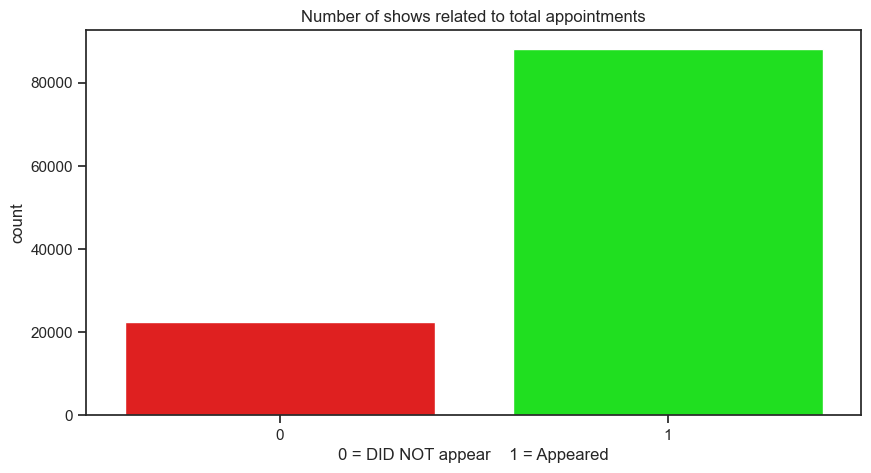

In [578]:
# plot the distribution 
plt.figure(figsize=(10, 5), dpi=100)

sns.set_theme(style="ticks")
sns.countplot(data=df, x = 'show', palette=["#FF0000", "#00ff00"])

plt.title("Number of shows related to total appointments")  
plt.xlabel("0 = DID NOT appear    1 = Appeared")

In [293]:
# Examine the correlation between the targeted column and the other columns 
print(df.corr()['show'])

# NOTES 
"""
Pearson correlation did not give us clear explanation, but we will examine the negative values from curriosity and few of the positive ones.
""" 

age              0.060319
scholarship     -0.029135
hipertension     0.035701
diabetes         0.015180
alcoholism       0.000196
handcap          0.006076
sms_received    -0.126431
gender-binary    0.004119
day_diff        -0.186231
show             1.000000
Name: show, dtype: float64


'\nPearson correlation did not give us clear explanation.\n'

## Exploratory Data Analysis (EDA)

In [296]:
# EDA

# 1. lets start by the gender
# LEST SPECIFY THE NUMBER OF FEMALES AND MALES THAT LOST THEIR APPOINTMENT

gender_no_shows = no_shows['gender']
print("The number of females and males that DID NOT APPEAR TO THEIR APPOINTMENT : ")
print(gender_no_shows.value_counts(), "\n")


females_not_show = df[(df['gender'] == 'F') & (df['show'] == 0)]
females_no_shows_percentage =  len(females_not_show) / len(df) * 100
females_no_shows_percentage

males_not_show = df[(df['gender'] == 'M') & (df['show'] == 0)]
males_no_shows_percentage =  len(males_not_show) / len(df) * 100
males_no_shows_percentage

print(f'{round(females_no_shows_percentage, 2)}% females and {round(males_no_shows_percentage, 2)}% males LOST THEIR APPOINTMENT.')

The number of females and males that DID NOT APPEAR TO THEIR APPOINTMENT : 
F    14594
M     7725
Name: gender, dtype: int64 

13.2% females and 6.99% males LOST THEIR APPOINTMENT.


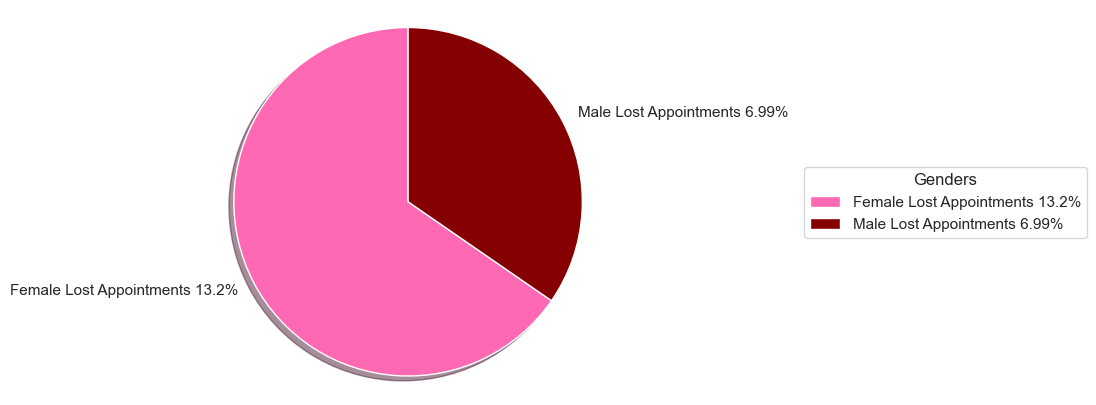

In [297]:
# EDA

#  plot the percentages
my_labels = ['Female Lost Appointments 13.2%', 'Male Lost Appointments 6.99%']
sizes = [females_no_shows_percentage,  males_no_shows_percentage]
my_colors = ["hotpink", "#850101"]


fig1, ax1 = plt.subplots(figsize = (10, 5), dpi=100)
ax1.pie(sizes, labels=my_labels,
        shadow=True, startangle=90, colors=my_colors)
ax1.axis('equal')  # qual aspect ratio ensures that pie is drawn as a circle.
ax1.legend(
          title="Genders",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [298]:
# EDA

# 2. correlate the days of scheduling and appointment days 

# create a brand new column for the difference
df['day_diff'] = (df['appointmentday'].dt.date - df['scheduledday'].dt.date).dt.days # -----> dt.days = turns the column to int64 by removing 'days' string
df['day_diff']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: day_diff, Length: 110527, dtype: int64

In [563]:
# EDA

# create categorical lists of date ranges
sameday = df[df['day_diff'] == 0]
threedays = df[df['day_diff'] == 3]
week = df[df['day_diff'] == 7]
tendays = df[df['day_diff'] == 10]

sameday_show_perc = round(len(sameday) / len(shows) * 100, 1)
threedays_show_perc = round(len(threedays) / len(shows) * 100, 1)
week_show_perc = round(len(week) / len(shows) * 100, 1)
tendays_show_perc = round(len(tendays) / len(shows) * 100, 1)

In [568]:
# EDA

# % probability to show up after x number of days
day_diff_perc = pd.DataFrame([sameday_show_perc, threedays_show_perc, week_show_perc, tendays_show_perc], index = ['sameday', 'threedays', 'week', 'tendays'], columns=['show_probability_per_day_difference_%'])
day_diff_perc

,show_probability_per_day_difference_%
sameday,43.7
threedays,3.1
week,5.6
tendays,1.6


In [542]:
# EDA

# CREATION OF UNIVERSAL CLASS WITH METHODS IN ORDER TO CORRELATE A SPECIFIED COLUMN WITH SHOWS        
class Data_obtain:
    def __init__(self, a_condition:list, have_condition:int, show:int, column_no_show = df['show'], dataframe = df)-> None:        
        self.a_condition = a_condition
        self.have_condition = have_condition
        self.show = show
        self.column_no_show = column_no_show
        self.dataframe = dataframe
        
        try:
            self.count_values = self.dataframe[(self.dataframe[self.a_condition] == self.have_condition) & (self.column_no_show == self.show)]
            self.size_count_values = len(self.count_values) 
            self.count_values_percentage = round(self.size_count_values / len(self.dataframe) * 100, 2)
        except (TypeError, ValueError) as err:
            print("Careful with the values given...")
            print(err)            
    
    def __repr__(self):        
        pattern_condition, pattern_show = str(), str()
        
        match self.have_condition:
            case 1:             
                pattern_condition = "WITH"
            case 0:                    
                pattern_condition = "WITH NO" 
                
        match self.show:                
            case 0:
                pattern_show = "DID NOT COME"
            case 1:
                pattern_show = "CAME"                                     
                   
        return f'{self.size_count_values} clients {pattern_condition} {self.a_condition} {pattern_show} to the scheduled appointment, being the {self.count_values_percentage}% of the total dataset.' 
    
    def show_status(self):
        return self.show
    
    def kind_of_condition(self):
        return self.a_condition
    
    def condition_status(self):
        return self.have_condition
    
    def values(self):
        return self.count_values
    
    def percentage(self):
        return self.count_values_percentage        
    
    def __len__(self):
        return self.size_count_values

In [583]:
# EDA

# CREATION OF UNIVERSAL METHOD FOR PLOTTING A SPECIFIED COLUMN WITH SHOWS
def plot(condition):
    condition_name = df[condition].name.upper()
    my_colors = ["#850101", "#056608"]    
    plt.figure(figsize = (10, 5), dpi = 100)                    
    plt.title(f"Distribution of {condition_name} with shows")
    ax = sns.countplot(data=df, x=condition, hue = 'show', palette=my_colors)        
    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))    

25698 clients WITH sms_received CAME to the scheduled appointment, being the 23.25% of the total dataset.

62510 clients WITH NO sms_received CAME to the scheduled appointment, being the 56.56% of the total dataset. 



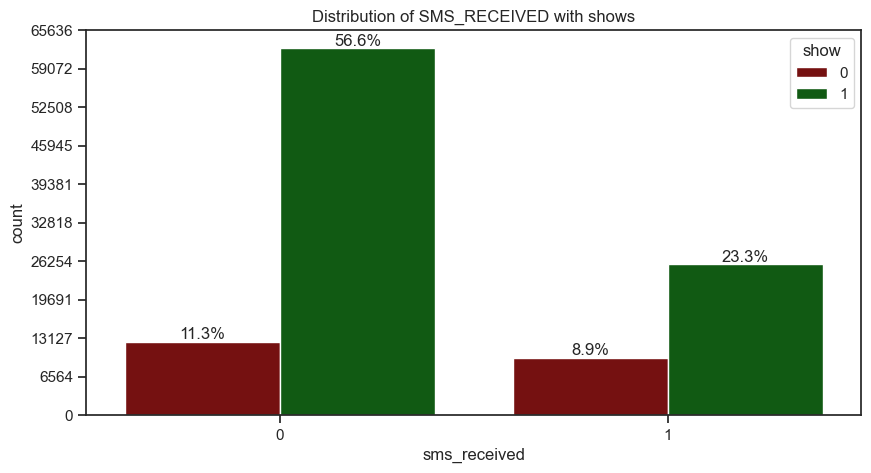

In [584]:
# EDA

# Distribution of sms_recieived
sms_received_and_came = Data_obtain("sms_received", have_condition=1, show=1)
sms_not_received_and_came = Data_obtain("sms_received", have_condition=0, show=1)

print(repr(sms_received_and_came) + "\n\n" +  repr(sms_not_received_and_came), "\n")
plot('sms_received')

8283 clients WITH scholarship CAME to the scheduled appointment, being the 7.49% of the total dataset.

79925 clients WITH NO scholarship CAME to the scheduled appointment, being the 72.31% of the total dataset. 



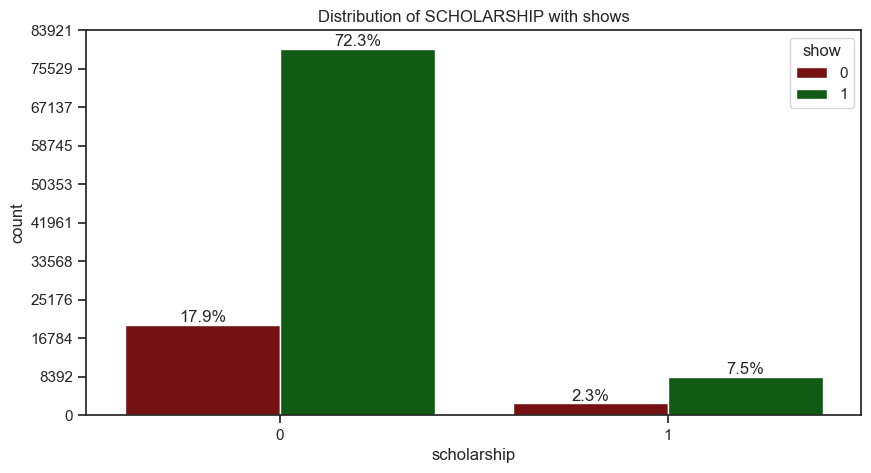

In [585]:
# EDA

# Distribution of scholarship
scholarship_and_came = Data_obtain("scholarship", have_condition=1, show=1)
not_scholarship_and_came = Data_obtain("scholarship", have_condition=0, show=1)

print(repr(scholarship_and_came) + "\n\n" +  repr(not_scholarship_and_came), "\n")
plot('scholarship')

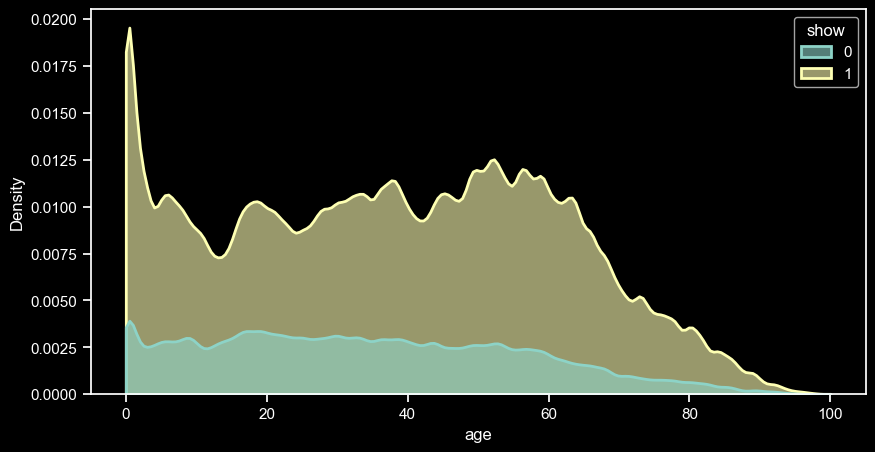

In [581]:
# EDA

# Distribution of ages
plt.figure(figsize = (10, 5), dpi=100)
plt.style.use("dark_background")
sns.kdeplot(x='age', data=df, linewidth = 2, hue = 'show', shade=True, alpha = 0.6, bw_adjust=0.3, clip = [0, 100])
sns.set(style='ticks')

In [537]:
# EDA

# percentage of missing appointments per neighbourhood
miss_per_neigh = round(no_shows['neighbourhood'].value_counts() / df['neighbourhood'].value_counts() * 100, 1)
miss_per_neigh_df = pd.DataFrame(data=miss_per_neigh)

# pull the 10 first neighbourhoods wit most missing appointments
miss_per_neigh_df.nlargest(10, 'neighbourhood')

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,100.0
SANTOS DUMONT,28.9
SANTA CECÍLIA,27.5
SANTA CLARA,26.5
ITARARÉ,26.3
JESUS DE NAZARETH,24.4
HORTO,24.0
ILHA DO PRÍNCIPE,23.5
ANDORINHAS,23.0
CARATOÍRA,23.0


## Findings

1.  Percentage of patients who didn't show up for their appointment is 20.19%.
2.  The percentage of females missing their appointment is nearly two times the number of males. 
3.  The longer the period between the scheduling and appointment the more likely the patient won't show up.
4.  Patients who received an SMS are more likely to miss their appointment. 
5.  Patients with scholarships are actually more likely to miss their appointment.
6.  Younger patients are more likely to miss their appointments.